Завдання: виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 3 та 5 з використанням Tensorflow & NN.


1. Регресія

Обробка та візуалізація даних:

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


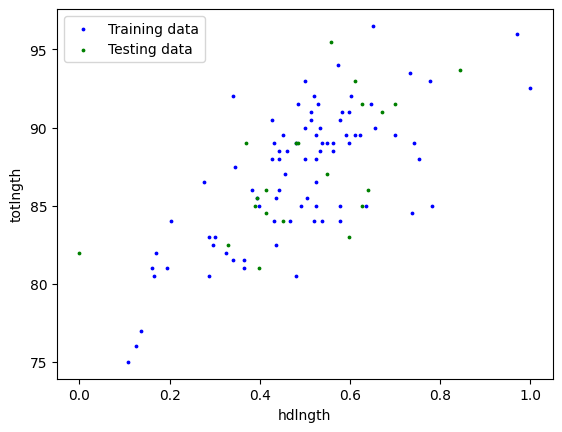

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf

data_path = r"C:\Users\Єва\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1"
file_name = "possum.csv"
data_file = os.path.join(data_path, file_name)


data = pd.read_csv(data_file)


print(data.head())


X = data[['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 
          'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]  
y = data['totlngth'] 


ct = make_column_transformer(
    (MinMaxScaler(), ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']),  
    (OneHotEncoder(handle_unknown="ignore"), ['site', 'Pop', 'sex'])  
)


ct.fit(X)
X = ct.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

plt.scatter(X_train[:, 0], y_train, c='b', label='Training data', s=3)  
plt.scatter(X_test[:, 0], y_test, c='g', label='Testing data', s=3)  
plt.xlabel('hdlngth')  
plt.ylabel('totlngth')  
plt.legend()
plt.show()



Створення та тренування моделі:

In [ ]:

tf.random.set_seed(42)


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))  
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6718
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4091
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3677
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3519
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3370
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3237
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3178
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3090
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3045
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2984
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2953
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2928
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2893
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2863
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1

Перевірка моделі:

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2552


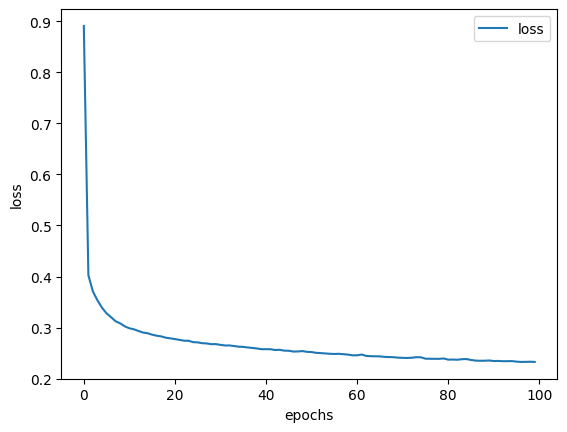

In [30]:
model.evaluate(X_test, y_test)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

2. Класифікація

Обробка та візуалізація даних:

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


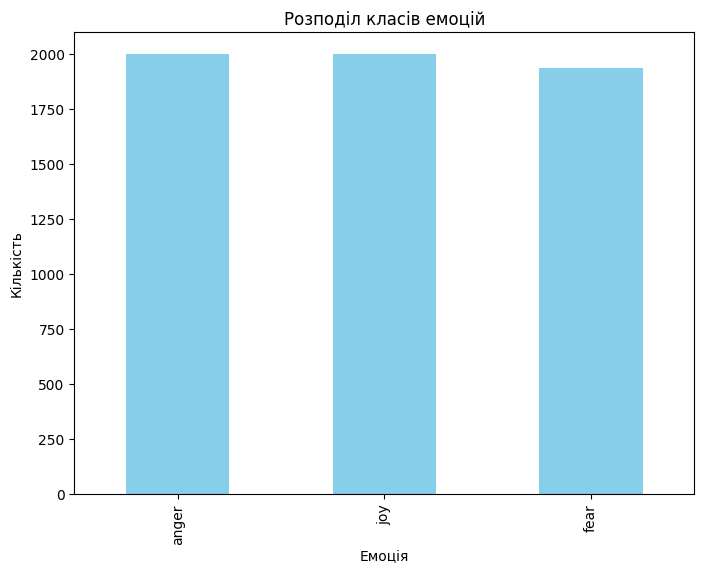

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf


file_path = "C:\\Users\\Єва\\OneDrive\\Data\\Emotion_classify_Data.csv"
EmotionData = pd.read_csv(file_path)


print(EmotionData.head())

X = EmotionData.drop(['Emotion', 'Comment'], axis=1)  
y = EmotionData['Emotion']  

ct = make_column_transformer(
    (MinMaxScaler(), X.select_dtypes(include=['int64', 'float64']).columns),  
    (OneHotEncoder(handle_unknown="ignore"), X.select_dtypes(include=['object']).columns) 
)


X_transformed = ct.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=32)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


plt.figure(figsize=(8,6))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Розподіл класів емоцій')
plt.xlabel('Емоція')
plt.ylabel('Кількість')
plt.show()


if X_train.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap='viridis', s=30)
    plt.xlabel('Ознака 1')
    plt.ylabel('Ознака 2')
    plt.title('Дані ознак (тренувальна вибірка)')
    plt.colorbar(label='Клас емоції')
    plt.show()




Створення та тренування моделі

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract text data from the 'Comment' column
comments = X['Comment']  # Assuming 'Comment' is the feature column

# Convert text data to numerical format using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
X_comments = vectorizer.fit_transform(comments)

# Convert the sparse matrix to a dense matrix (if needed)
X_comments_dense = X_comments.toarray()

# Now, X_comments_dense can be used for training
# Split into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_comments_dense, y, test_size=0.2, random_state=42)

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=7)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=100)


Epoch 1/100


c:\Users\Єва\OneDrive\Робочий стіл\Data-science\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4138 - loss: 1.5747
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.7596
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.2732
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1450
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0974
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9843 - loss: 0.0701
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0517
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0386
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0295
Epoch 10/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0229
Epoch 11/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0182
Epoch 12/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Перевірка моделі:

Text(0, 0.5, 'loss')

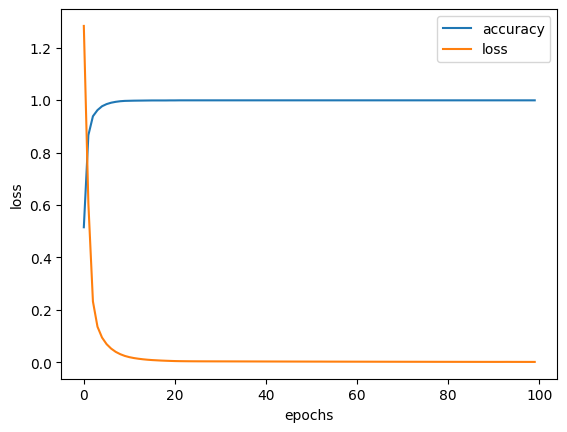

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')